# DBSCAN(Density Based Spatial Clustering of Applications with Noise)

## DBSCAN

- DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행함.

- <img src="../images/dbscan.png " width="500px" height="300px" title="DBSCAN"></img>
  - DBSCAN은 알고리즘이 데이터 밀도 차이를 자동으로 감지하며 군집을 생성하므로 사용자가 군집 개수를 지정할 수 없음.


## 군집화 알고리즘별 비교

- https://scikit-learn.org/stable/modules/clustering.html
  
- <img src="../images/dbscan.jpg " width="1200px" height="800px" title="DBSCAN"></img>
    - DBSCAN은 데이터의 밀도가 자주 변하거나, 아예 모든 데이터의 밀도가 크게 변하지 않으면 군집화 성능이 떨어짐
    - 피처의 개수가 많으면 군집화 성능이 떨어짐


## DBSCAN의 구성 요소

- DBSCAN을 구성하는 가장 중요한 두 가지 파라미터는 입실론(epsilon)으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 min poiint임.
    - 입실론 주변 영역(epsilon) : 개별 데이터를중심으로 입실론 반경을 가지는 원형의 영역.
    - 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
    - <img src="../images/dbscan1.png " width="1200px" height="800px" title="DBSCAN"></img>
    - <img src="../images/dbscan2.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 1

- P1에서 P12까지 12개의 데이터 세트에 대해서 DBSCAN 군집화를 적용하면서 주요 개념을 설명

- 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정
    - <img src="../images/dbscan3.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 2

- P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신은 P1, 이웃 데이터 P2, P6, P7, P8, P9, P11)로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)임.
    - <img src="../images/dbscan4.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 3

- 다음으로 이웃데이터중 Core Point를 찾았을 때, P2 역시 반경 내에 6개의 데이터(자신은 P2, 이웃 데이터 P1, P3, P4, P9, P10)를 가지고 있으므로 핵심 포인트임.
    - <img src="../images/dbscan5.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 4

- 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심포인트일 경우 P1에서 P2로 연결해 직접 접근이 가능함.
    - <img src="../images/dbscan6.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 5

- 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성함. 이러한 방식으로 점차적으로 군집(Cluster) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식임
    - <img src="../images/dbscan6.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 6

- P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2, P4로 2개이므로 군집으로 구분할 수 있는 핵심 포인트가 될 수 없음. 
- 하지만, 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있음. 이처럼 자신은 핵심 포인트가 아니지만, 이웃 데이터로 핵심 포인트를 가지고 있는 경계 포인트(Boarder Point)라고 함. 경계 포인트는 군집의 외곽을 형성함.

    - <img src="../images/dbscan7.png " width="1200px" height="800px" title="DBSCAN"></img>

## DBSCAN 절차 - 7

- 다음 그림의 P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡음 포인트(Noise Point)라고 함.

    - <img src="../images/dbscan9.png " width="1200px" height="800px" title="DBSCAN"></img>

## 사이킷런 DBSCAN
- 사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원함. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있음
    - eps : 입실론 주변 영역의 반경을 의미함
    - min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미함
                    (자신의 데이터를 포함함. 위에서 설명한 min points + 1)

### DBSCAN 적용하기 – 붓꽃 데이터 셋

In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**eps 0.6 min_samples=8 로 DBSCAN 군집화 적용**

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [3]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

**PCA 2개 컴포넌트로 기존 feature들을 차원 축소 후 시각화**

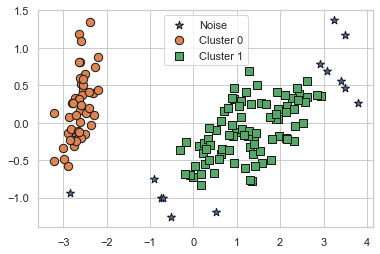

In [4]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**eps의 크기를 증가 한 후 노이즈 확인**

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


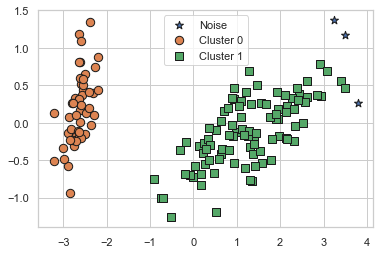

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


**min_samples의 크기를 증가 후 노이즈 확인**

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


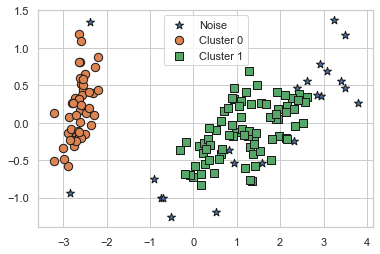

In [6]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 – make_circles() 데이터 세트

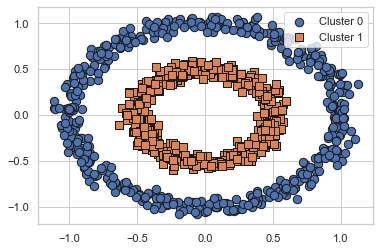

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


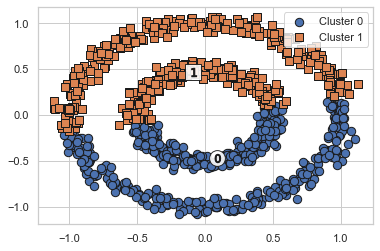

In [9]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


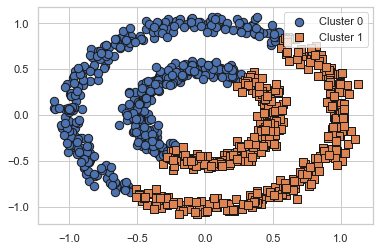

In [10]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


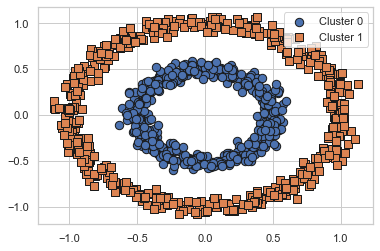

In [11]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
